In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Lectura de datos

In [73]:
train = pd.read_csv('G:/Mi unidad/VSC/DSA_DATACAMP/proyectos/credit_card_fraude/data/fraudTrain.csv')
test = pd.read_csv('G:/Mi unidad/VSC/DSA_DATACAMP/proyectos/credit_card_fraude/data/fraudTest.csv')

data = pd.concat([train, test], axis=0, ignore_index=True)
data.drop(columns=['Unnamed: 0'], inplace=True)

In [74]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,Michael,Olson,M,558 Michael Estates,Luray,...,40.493,-91.891,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.947,-91.333,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.039,-95.440,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661,-96.187,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.197,-118.902,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658,-119.715,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.626,-116.449,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.471,-117.081,0


# Análisis general

### ¿Cuántas transacciones existen y cuántas variables tenemos?

In [75]:
print(f'El dataset tiene {data.shape[0]} transacciones y {data.shape[1]} variables.')

print(data.columns)

El dataset tiene 1852394 transacciones y 22 variables.
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


### ¿Cuántos datos perdidos e inconsistentes exsiten?

In [76]:
if data.isnull().sum().sum() == 0:
    print('El dataset no tiene valores nulos.')
else:
    print('El dataset tiene valores nulos.')
    print(data.isnull().sum())

El dataset no tiene valores nulos.


### ¿Existen transacciones duplicadas?

In [77]:
if data.duplicated().nunique() == 1:
    print('No hay transacciones duplicads')
else: 
    print('Hay transacciones duplicadas, debemos corregir eso.') # Esto quiere decir que no hay duplicados, ya que devuelve un solo valor (False) y no una serie de valores booleanos.

No hay transacciones duplicads


### ¿Cómo se distribuyen los clientes por target?

In [78]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [79]:
data['is_fraud'] = data['is_fraud'].astype('category')

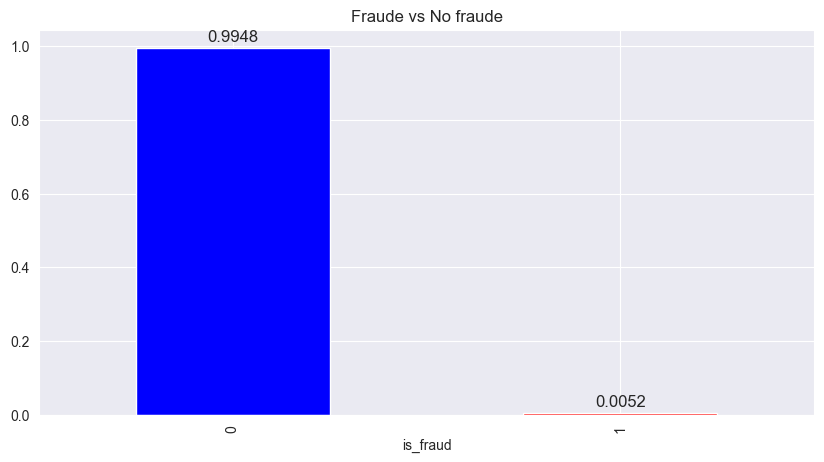

In [80]:
plt.figure(figsize=(10, 5))
data['is_fraud'].value_counts(normalize=True).plot(kind = 'bar', title = 'Fraude vs No fraude', color = ['blue', 'red'])

# Vamos a colocar el valor encima de cada barra

for i, v in enumerate(data['is_fraud'].value_counts(normalize=True)):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom', fontsize=12)

# Análisis de variables temporales

### ¿Qué rango de fechas cubren las transacciones?

In [81]:
data['trans_date_trans_time'].dtype # El resultad es 'O' quiere decir que es un objeto, por lo que no es un datetime. Vamos a convertirlo a datetime.

dtype('O')

In [82]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [83]:
data['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1852389   2020-12-31 23:59:07
1852390   2020-12-31 23:59:09
1852391   2020-12-31 23:59:15
1852392   2020-12-31 23:59:24
1852393   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]

In [84]:
data['trans_date_trans_time'].dt.year.unique()

array([2019, 2020], dtype=int32)

In [85]:
print(f"Las trasanccioes van de {data['trans_date_trans_time'].dt.year.unique()[0]} hasta {data['trans_date_trans_time'].dt.year.unique()[1]}") # Años en los que se realizaron las transacciones.

Las trasanccioes van de 2019 hasta 2020


In [86]:
df = data.copy()

In [87]:
df['mes'] = df['trans_date_trans_time'].dt.month
df['año'] =  df['trans_date_trans_time'].dt.year
df['horas'] = df['trans_date_trans_time'].dt.hour 

In [88]:
df['mes'].unique() # Meses en los que se realizaron las transacciones. 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

### ¿En qué horarios se realizan más fraudes? ¿Hay diferencias horarias con transacciones normales?

In [89]:
fraud_2019 = df[df['is_fraud'] == 1]['mes'].value_counts().sort_index(ascending=True).to_frame(name = 'fraudes')

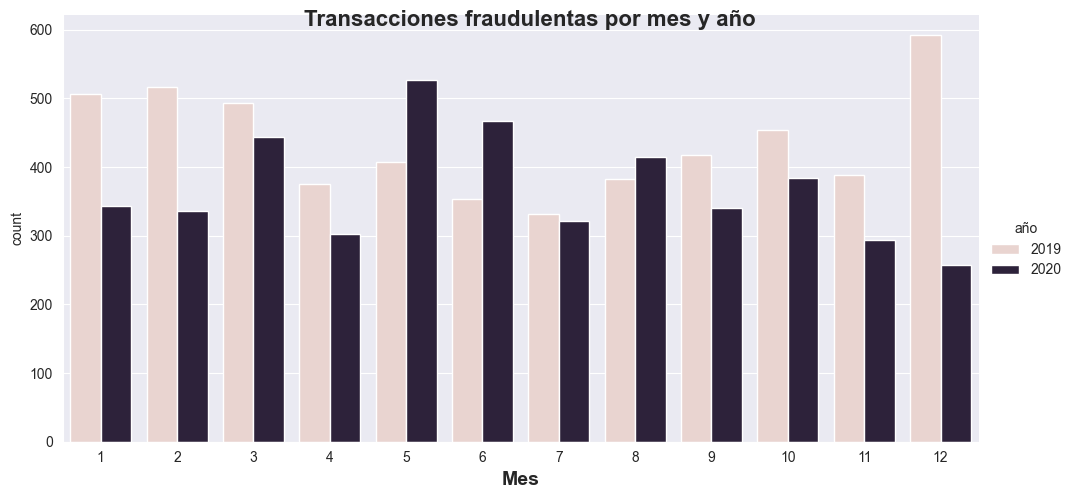

In [90]:
sns.catplot(x='mes', hue='año', data=df[df['is_fraud'] == 1], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones fraudulentas por mes y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.show()


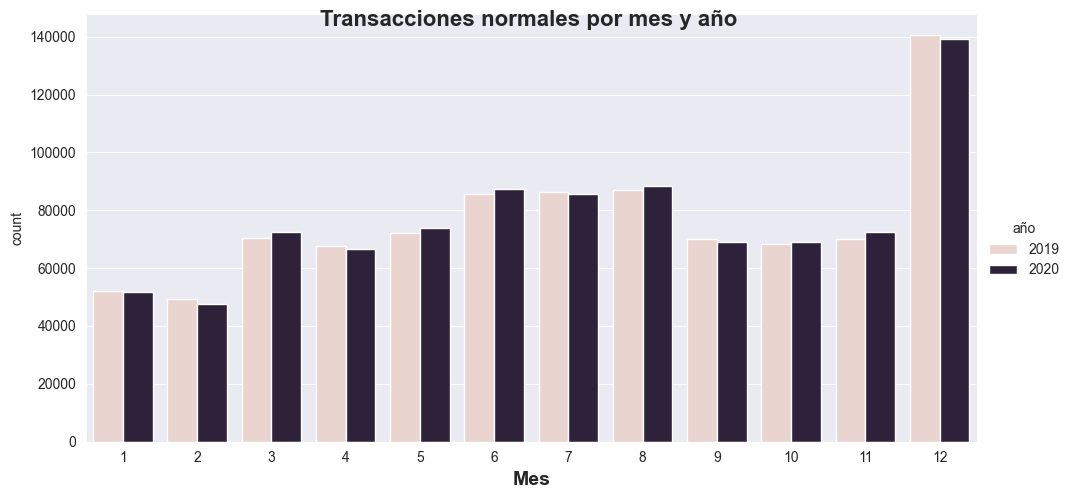

In [91]:
sns.catplot(x='mes', hue='año', data=df[df['is_fraud'] == 0], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones normales por mes y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.show()


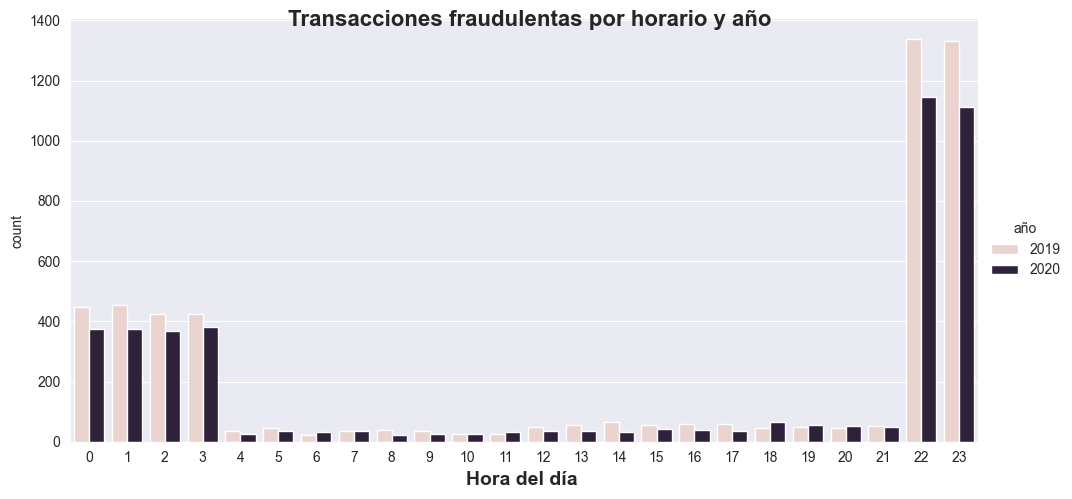

In [92]:
sns.catplot(x='horas', hue='año', data=df[df['is_fraud'] == 1], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones fraudulentas por horario y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Hora del día ', fontsize=14, fontweight='bold')
plt.show()


### ¿Qué días de la semana tienen más transacciones fraudulentas?



In [93]:
df['dias'] = df['trans_date_trans_time'].dt.day 

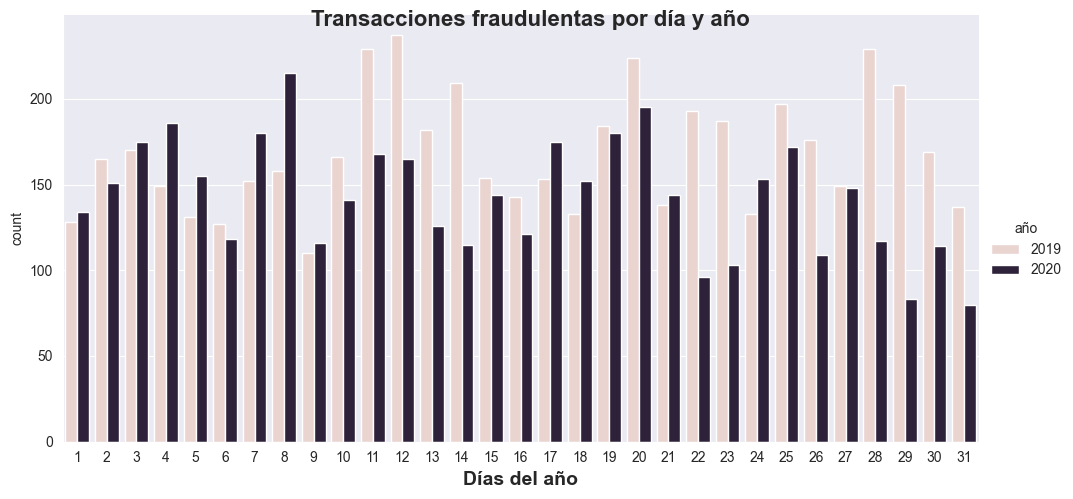

In [94]:
sns.catplot(x='dias', hue='año', data=df[df['is_fraud'] == 1], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones fraudulentas por día y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Días del año', fontsize=14, fontweight='bold')
plt.show()


### A partir de dob, ¿qué edades tienen los clientes?


In [95]:
# Vamos a crear una variable edad, calculando en base la fecha de la transacción y la fecha de nacimiento.

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

delta = df['trans_date_trans_time'] - df['dob']

df['edad'] = delta.dt.days // 365 # Dividimos entre 365 para obtener la edad en años

In [96]:

pd.set_option('display.float_format', lambda x: '%.3f' % x) # Esto es para que no se muestre en notación científica.
df['edad'].describe() # Vamos a ver la edad de los clientes.

count   1852394.000
mean         45.797
std          17.424
min          13.000
25%          32.000
50%          44.000
75%          57.000
max          96.000
Name: edad, dtype: float64

### ¿Qué distribución de edad existe en general?


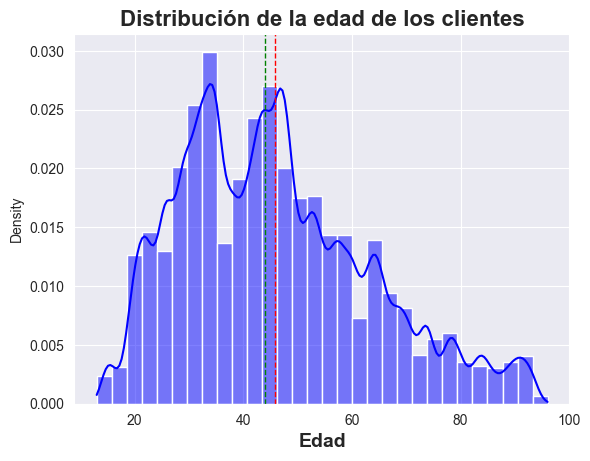

In [97]:


sns.histplot(df['edad'], bins=30, kde=True, color='blue', stat='density', alpha=0.5)
plt.axvline(df['edad'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['edad'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribución de la edad de los clientes', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=14, fontweight='bold')
sns.set_style('darkgrid')
plt.show()



### ¿Los fraudes son más comunes en ciertos grupos de edad?



In [98]:
# Vamos a crear grupos de edad con cut 

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False) 
df['grupo_edad'].value_counts()


grupo_edad
26-35    400348
36-45    392661
46-55    373555
66+      285917
56-65    232413
19-25    145700
0-18      21800
Name: count, dtype: int64

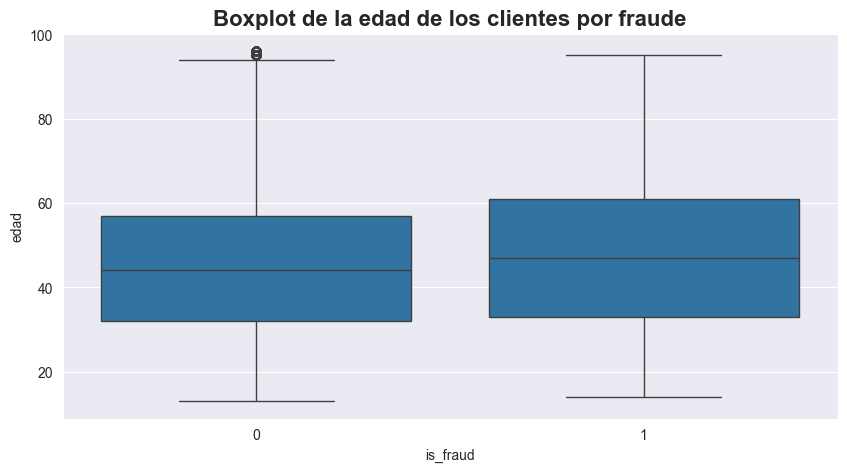

In [99]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_fraud', y='edad', data=df)
plt.title('Boxplot de la edad de los clientes por fraude', fontsize=16, fontweight='bold')
plt.show()

In [100]:
# Vamos a crear grupos de edad con cut 

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False) 
df['grupo_edad'].value_counts()


grupo_edad
26-35    400348
36-45    392661
46-55    373555
66+      285917
56-65    232413
19-25    145700
0-18      21800
Name: count, dtype: int64

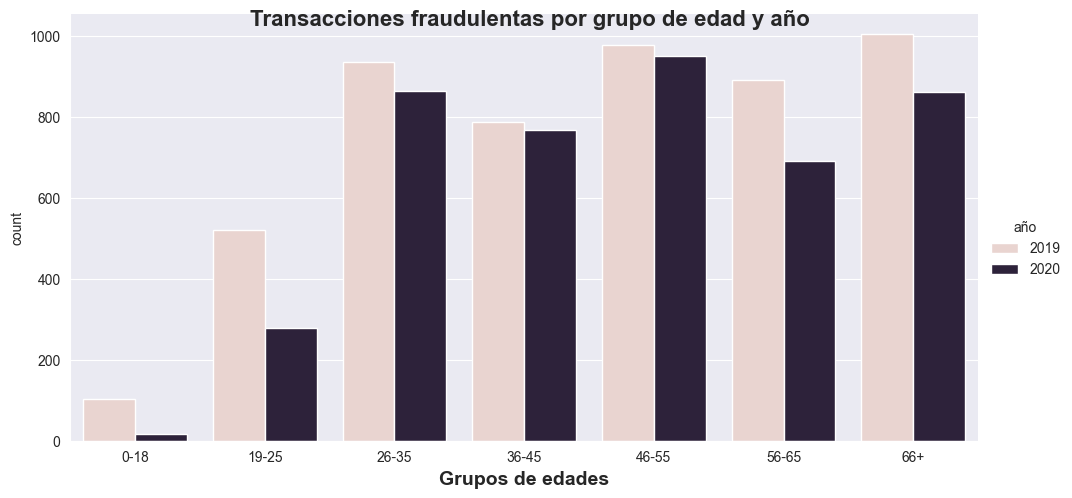

In [101]:
sns.catplot(x='grupo_edad', hue='año', data=df[df['is_fraud'] == 1], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones fraudulentas por grupo de edad y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Grupos de edades', fontsize=14, fontweight='bold')
plt.show()


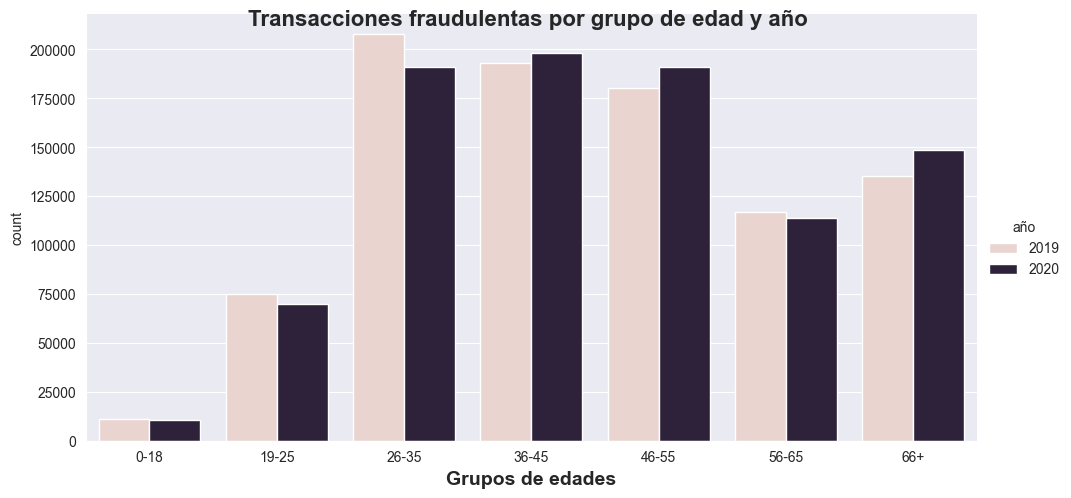

In [102]:
sns.catplot(x='grupo_edad', hue='año', data=df[df['is_fraud'] == 0], kind='count',height=5, aspect=2)
plt.suptitle('Transacciones fraudulentas por grupo de edad y año', fontsize=16, fontweight='bold')
sns.set_style('darkgrid')
plt.xlabel('Grupos de edades', fontsize=14, fontweight='bold')
plt.show()


### ¿Existen diferencias en city_pop entre fraudes y transacciones normales? (¿Se comete más fraude en ciudades grandes o pequeñas?)

# Análisis de variables de ubicación

### ¿Qué estados (`state`) presentan mayores tasas de fraude?

<Axes: title={'center': 'Transacciones fraudulentas por estado'}, xlabel='state'>

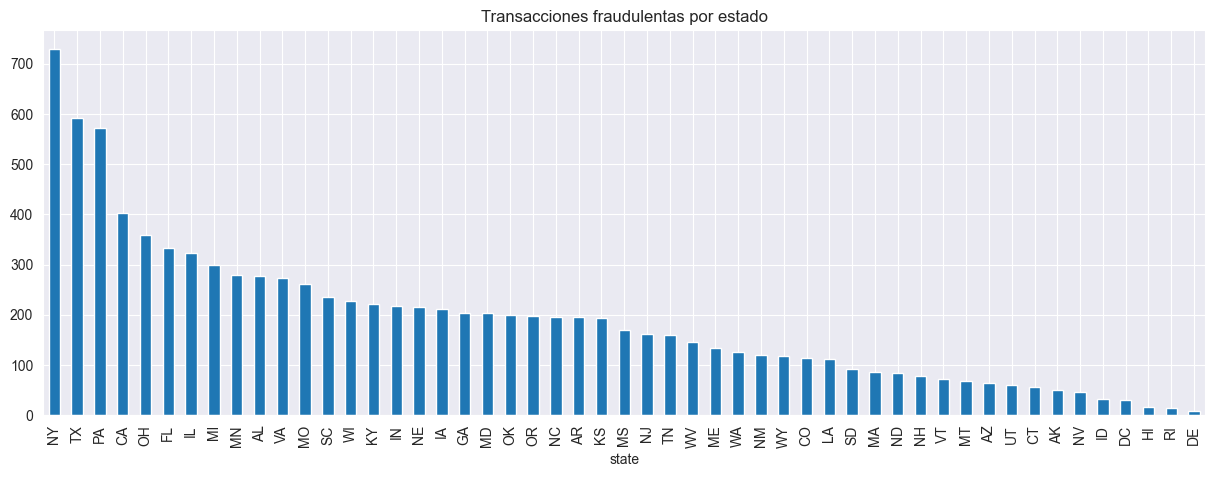

In [103]:
plt.figure(figsize=(15, 5))
df[df['is_fraud'] == 1]['state'].value_counts().plot(kind='bar', title = 'Transacciones fraudulentas por estado')

### ¿Qué ciudades (`city`) tienen más fraudes, en proporción al total de transacciones?

In [104]:
df_geo = df[df['is_fraud'] == 1].copy()

In [105]:
# 1. Filtrar solo los fraudes
df_fraud = df_geo[df_geo['is_fraud'] == 1]

# 2. Agrupar: Ciudad, Estado -> Latitud promedio, Longitud promedio, y contar fraudes
fraudes_por_ciudad = df_fraud.groupby(['city', 'state']).agg(
    lat=('lat', 'mean'),    # Latitud promedio de la ciudad
    long=('long', 'mean'),  # Longitud promedio de la ciudad
    recuento_fraudes=('is_fraud', 'count')  # Total de fraudes
).reset_index()

# 3. Graficar ahora por ciudad, donde color depende del recuento
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'  # Para abrir en navegador si estás en Spyder

fig = px.scatter_geo(
    fraudes_por_ciudad,
    lat='lat',
    lon='long',
    hover_name='city',
    size='recuento_fraudes',           # Tamaño de burbuja = recuento de fraudes
    color='recuento_fraudes',           # Color de burbuja = recuento de fraudes
    color_continuous_scale="Reds",      # Gradiente de rojo (más fraude, más rojo)
    scope='usa',
    title='Concentración de Fraudes por Ciudad en EE.UU.',
    opacity=0.7
)

fig.update_layout(geo=dict(
    showland=True, landcolor="rgb(217, 217, 217)",
))
fig.show()


In [106]:
df_fraud_o = df.copy()
df_fraud_o['is_fraud'] = df_fraud_o['is_fraud'].replace({0: 'No fraude', 1: 'Fraude'})

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_8520\4223963311.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



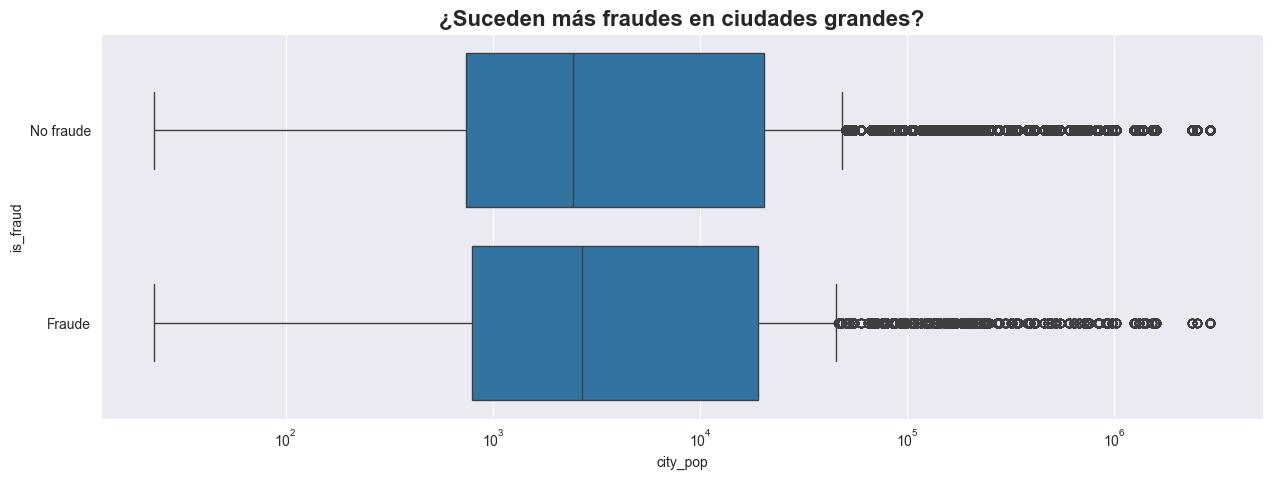

In [107]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df_fraud_o, y = 'is_fraud', x= 'city_pop')
plt.xscale('log')
plt.title('¿Suceden más fraudes en ciudades grandes?', fontsize=16, fontweight='bold')
plt.show()

### ¿Qué distancia hay entre la ubicación del cliente (lat, long) y del comercio (merch_lat, merch_long)? ¿Hay más fraude cuando la distancia es inusualmente grande?

In [108]:
# Calcular la distancia entre las coordenadas del negocio y del cliente

from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    # Distancia
    distance = R * c
    return distance



In [109]:
df['distancia_cliente_negocio'] = df.loc[:,['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

In [110]:
df['is_fraud'] = df['is_fraud'].replace({0: 'No fraude', 1: 'Fraude'})

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_8520\453122788.py:1: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



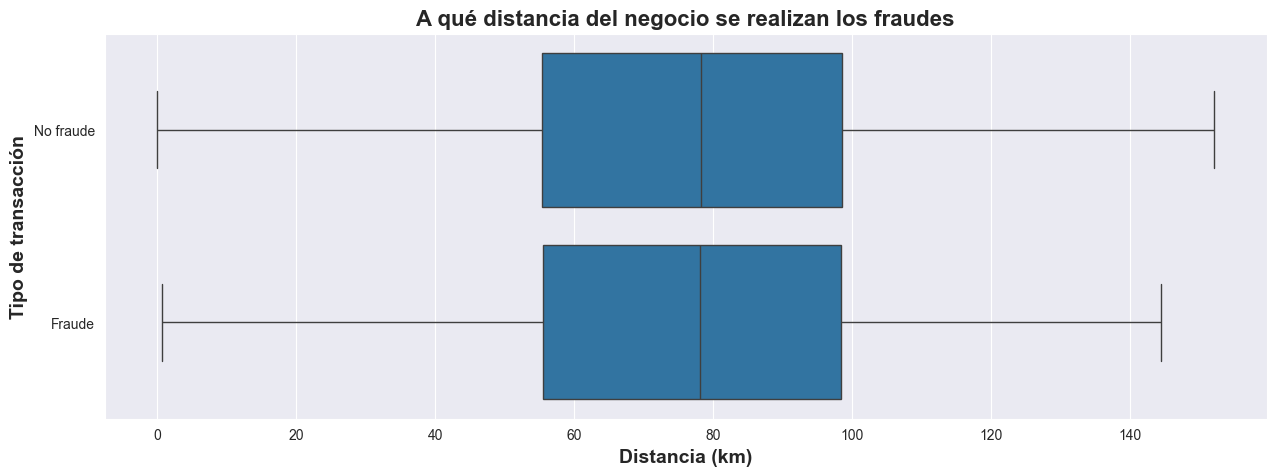

In [111]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df,x = 'distancia_cliente_negocio',y='is_fraud') # Vamos a ver la distancia entre el cliente y el negocio.
plt.title('A qué distancia del negocio se realizan los fraudes', fontsize=16, fontweight='bold')
plt.xlabel('Distancia (km)', fontsize=14, fontweight='bold')
plt.ylabel('Tipo de transacción', fontsize=14, fontweight='bold')
plt.show()

# Análisis de Variables Categóricas

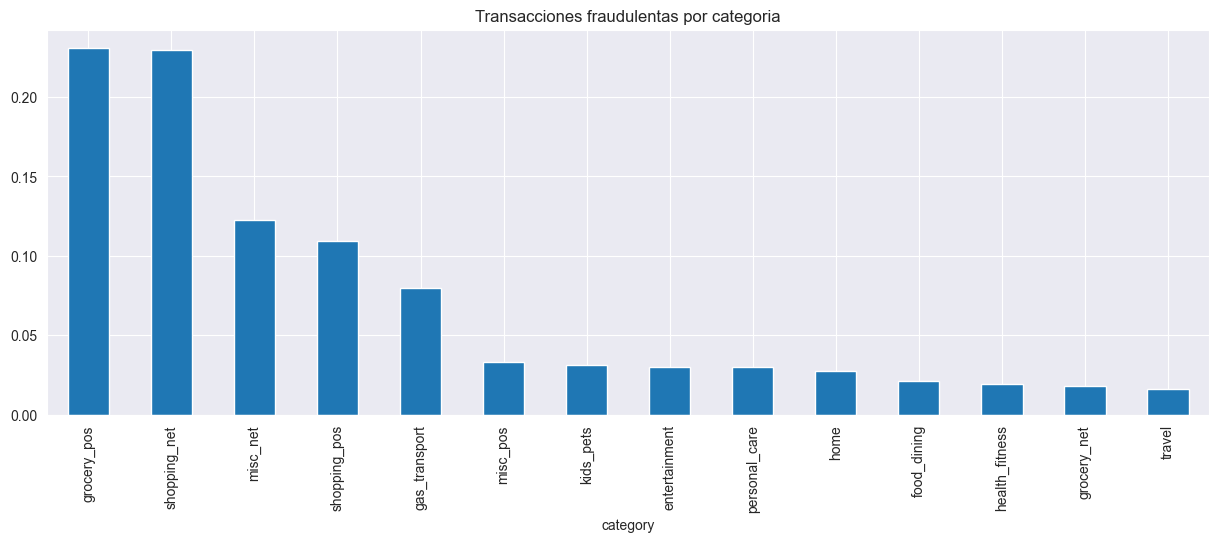

In [112]:
plt.figure(figsize=(15, 5))
df[df['is_fraud'] == 'Fraude']['category'].value_counts(normalize=True).plot(kind='bar', title = 'Transacciones fraudulentas por categoria')
plt.show()

### ¿Cuáles son las categorías (category) de compras más frecuentes?

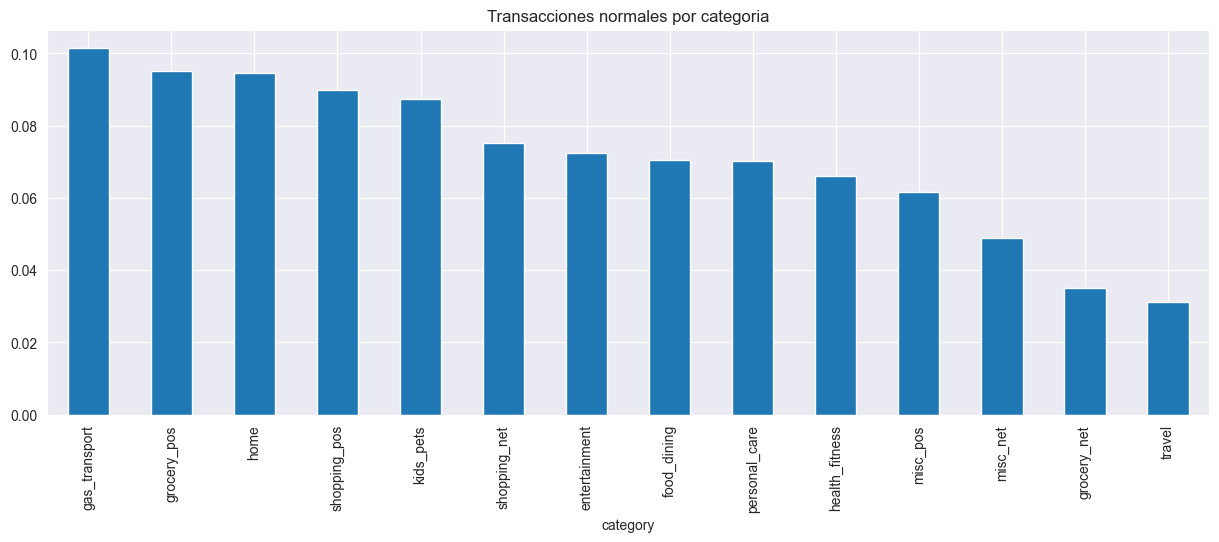

In [113]:
plt.figure(figsize=(15, 5))
df['category'].value_counts(normalize=True).plot(kind='bar', title = 'Transacciones normales por categoria')
plt.show()

### ¿Cuáles comercios (merchant) concentran más transacciones fraudulentas?

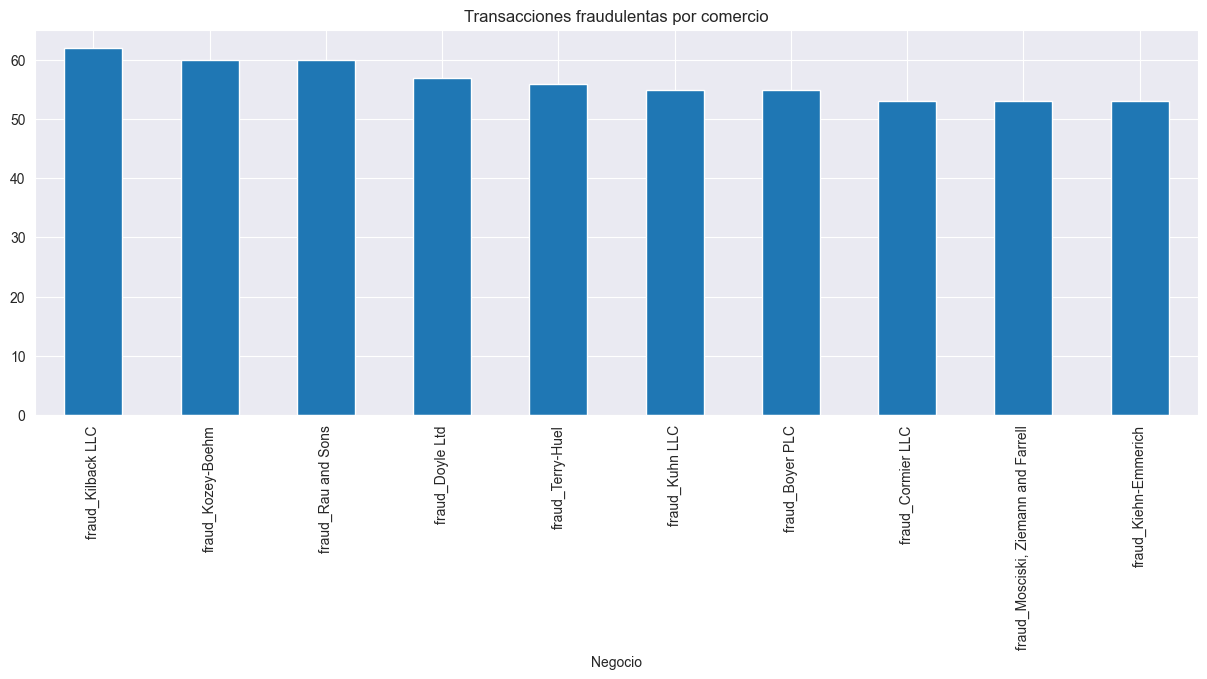

In [114]:
plt.figure(figsize=(15, 5))
df[df['is_fraud'] == 'Fraude']['merchant'].value_counts(normalize=False).head(10).plot(kind='bar', title = 'Transacciones fraudulentas por comercio')
plt.xlabel('Negocio')
plt.show()

### ¿El género (gender) del cliente influye en la tasa de fraude?

<Axes: xlabel='gender', ylabel='is_fraud'>

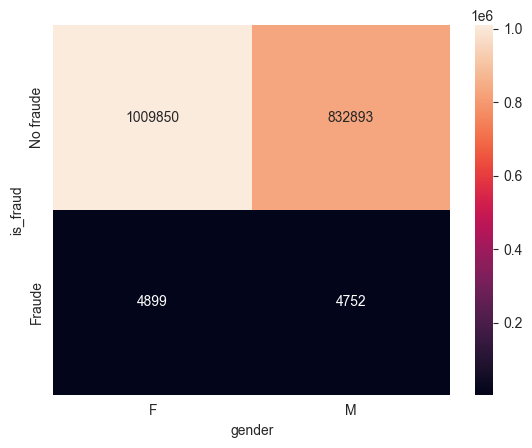

In [115]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['gender']), annot=True, fmt='d')

### ¿Ciertos trabajos (job) están asociados a mayores tasas de fraude?

In [116]:
pd.crosstab(df['is_fraud'],df['job']).T.sort_values(by = 'Fraude', ascending = False)

is_fraud,No fraude,Fraude
job,,
Quantity surveyor,8011,69
Naval architect,12368,66
Materials engineer,11649,62
Audiological scientist,8743,58
Senior tax professional/tax inspector,5820,57
...,...,...
Statistician,3642,3
Contractor,4364,2
"Engineer, communications",2190,0


### Análisis de variables numéricas 

<Figure size 1500x500 with 0 Axes>

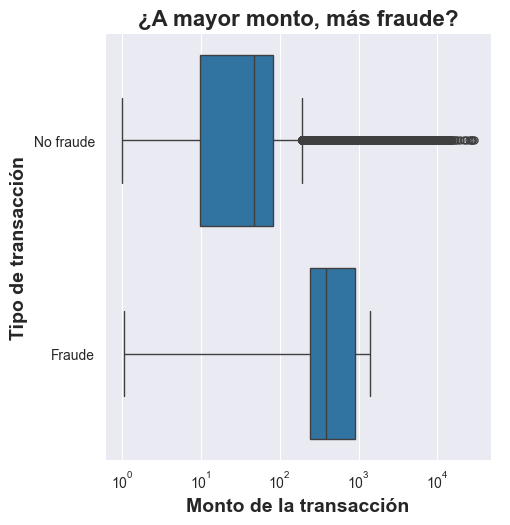

In [117]:
plt.figure(figsize=(15, 5))
sns.catplot(x='amt', data=df, y='is_fraud',kind = 'box')
plt.title('¿A mayor monto, más fraude?', fontsize=16, fontweight='bold')
plt.xlabel('Monto de la transacción', fontsize=14, fontweight='bold')
plt.ylabel('Tipo de transacción', fontsize=14, fontweight='bold')
plt.xscale('log')
plt.show()

### ¿Cómo se distribuye la población de las ciudades (city_pop) donde ocurren fraudes?

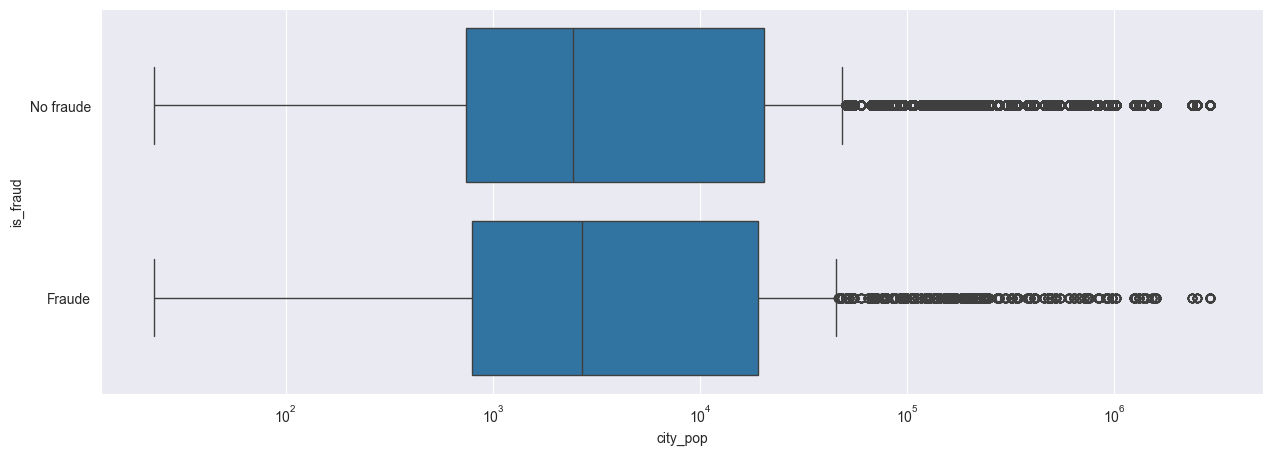

In [118]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df,x = 'city_pop',y='is_fraud') 
plt.xscale('log') # Aunque apliqué log a la escala, aún sigue teniendo outliers 

###  ¿Existen montos extraños?

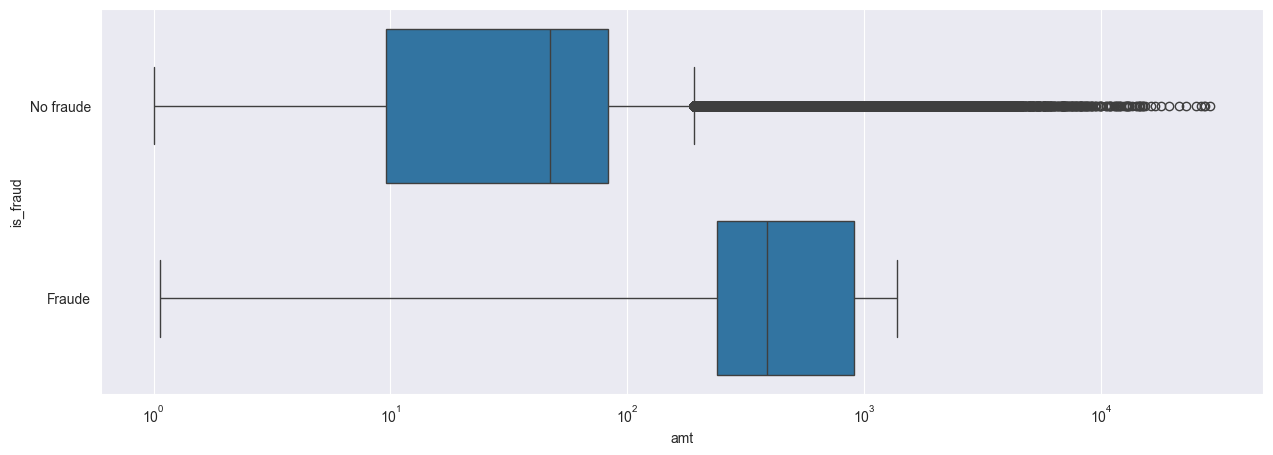

In [119]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df,x = 'amt',y='is_fraud') 
plt.xscale('log') # Aunque apliqué log a la escala, aún sigue teniendo outliers 

### Relaciones entre variables

In [120]:
df.select_dtypes(['int', 'float']).columns # Vamos a ver las variables numéricas del dataset.

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'mes', 'año', 'horas', 'dias', 'edad',
       'distancia_cliente_negocio'],
      dtype='object')

In [121]:
# Montos fraudulentos 
montos_fraudulentos = df[df['is_fraud'] == 'Fraude']


Text(0.5, 36.72222222222221, 'Monto de la transacción')

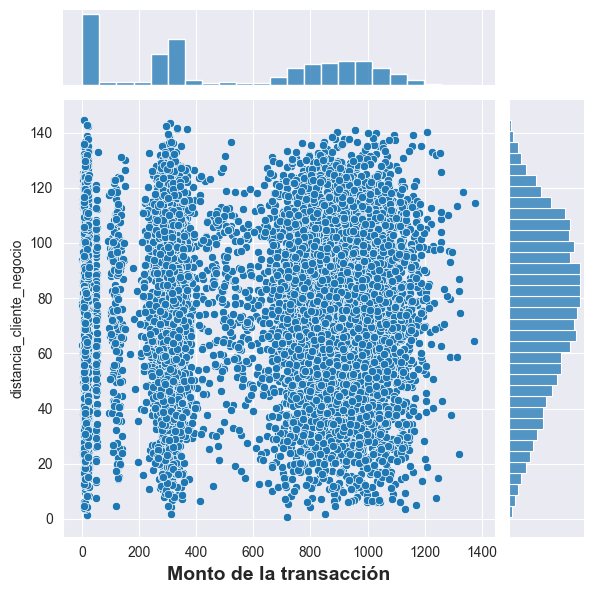

In [122]:

sns.jointplot(data = montos_fraudulentos,x = 'amt',y = 'distancia_cliente_negocio',kind = 'scatter')
plt.xlabel('Monto de la transacción', fontsize=14, fontweight='bold') 